<font size=5  color=#003366> <b>[LELEC2900] - Signal Processing <br><br> 
Python01 - Python Good Practice and Applications to Signal Processing</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. L. Vandendorpe<br>
Prof. L. Jacques
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Florian Quatresooz (florian.quatresooz@uclouvain.be) <br>
<br><br>
</font>

The objective of this first session is twofold. On the one hand, exercises 1 and 2 have will provide you some advice to write efficient python code. Even though you have already used Python, we strongly encourage you to work on these exercises. On the other hand, exercises 3 and 4 consist in usual signal processing applications. <br> <br>


<font size=5 color=#009999> <b>1. Conditional Indexing</b> </font> <br> <br>

<font size=5 color=#009999> <i>1.1 Context</i> </font>

It is possible to retrieve specific elements of a list or a numpy arrays by using simple indices. For example, 

   - <samp>array[5]</samp> selects the 6th element of the array;
   - <samp>array[0:2]</samp> selects the first 3 elements;
   - <samp>array[-1]</samp> selects the last element.
   
In this exercise, we will explore an other indexing method that is much more efficient. <br><br>

<font size=5 color=#009999> <i>1.2 Fancy indexing on a vector</i> </font>

First, a boolean array can be created by applying a condition over all elements of an array. 
For example, <samp>bool_array  = array > 0</samp> will create a boolean array 

- of the same size of <samp>array</samp>;
- in which an index is <samp>True</samp> if the value in <samp>array</samp> is greater than zero. 

This boolean array can then be used to index values of an array depending on the boolean value of the corresponding index in  <samp>bool_array</samp> (e.g. <samp>array\[bool_array\]</samp>). <br>

For this exercise: 
<ol>
   <li> Generate a numpy array (called <samp>randomVec</samp>) of size 100 with random integer values between -20 and 20;
   <li> Generate a numpy array (called <samp>booleanVec</samp>) of size 100 in which <samp>booleanVec[i]</samp> is <samp>True</samp> iff <samp>randomVec[i]</samp> is greater than 0.<font color=#cc3300> Do not use any for loop! </font> 
   <li> Use <samp>booleanVec</samp> to compute the mean of the strictly positive values in <samp>randomVec</samp> <font color=#cc3300>. Again, do it without using any for loop! </font>
   <li> Compute and display the mean of values that are strictly positive and odd.
       <div class="alert alert-info">
        <b>PYTHON TIP</b>  <br>
        In order to retrieve odd values in an array, you should think about the use of the modulo operator "%".
        </div>
</ol>       

In [20]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
#%pip install matplotlib
import numpy as np 
import matplotlib.pyplot as plt
import random as rd


randomVec       = np.array([rd.randint(-20,20) for _ in range(100)])
booleanVec      = randomVec > 0



VecPositiveMean = sum(randomVec[booleanVec])/len(randomVec[booleanVec]) #be smarter than this stupid value
print('The mean of the positive values is:', round(VecPositiveMean,2))
VecOddMean      = sum(randomVec[booleanVec][randomVec[booleanVec]%2 > 0 ])/len(randomVec[booleanVec][randomVec[booleanVec]%2 >0]) #be smarter than this stupid value
print('The mean of the positive odd values is:', round(VecOddMean,2), '\n')

The mean of the positive values is: 10.6
The mean of the positive odd values is: 11.15 



<font size=5 color=#009999> <i>1.3 Execution time comparison</i> </font>

Let's quantify the time efficiency of our implementation by testing it over a bigger array!

As done previously, we will compute the mean of positive and odd values over an an intial random numpy array of size 5000x5000 (still with random integer values between -20 and 20).
Compare the execution time of two implementations: 
<ol>
   <li> An implementation with conditional indexing (without for loop); 
   <li> A naïve implementation using for loop and if/else conditions to retrive positive and odd values of the array.
</ol>   

In [41]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

import time

print('---------------- EXERCISE ON THE ARRAY ---------------- ')
print('---------------- WITH CONDITIONAL INDEXING ---------------- ')

randomArray   = np.array([[rd.randint(-20,20) for _ in range(5000)] for __ in range(5000)])
booleanArray  = randomArray[randomArray > 0] % 2 > 0
#print(randomArray)
#print(randomArray[randomArray > 0][booleanArray])
start_time    = time.time()
ArrayOddMean  = np.mean(randomArray[randomArray > 0][booleanArray]) #be smarter than this stupid value
elapsend_time = (time.time() - start_time)*1000
print('The mean of the positive odd values is:', round(ArrayOddMean,2), " (computed in )", \
      round(elapsend_time), " ms \n")


print('---------------- WITHOUT CONDITIONAL INDEXING ---------------- ')
"""
selectOddPositives is a function that recursively loop over an array to retrieve odd and positive value and then
returns the mean of those retrieved values.
    INPUT: a numpy array with random integer values.
    OUTPUT: the mean of the odd and positives values in the array.
"""
def selectOddPositives(array): 
    count  = 0
    l = []
    for i in range(len(array)):
        
        if type(array[i]) == np.ndarray:
            found, number = selectOddPositives(array[i])
           # print(found, number)
            l = l + found
            count += number

            
        elif array[i] > 0 and array[i] % 2 > 0 :
            count += 1
            l.append(array[i])
    # Complete...
    
    return l, count

def mean_recur(array):
    l, count = selectOddPositives(array)
    #print(l,count)
    if count == 0:
        return 0
    return sum(l)/count

start_time    = time.time()
ArrayOddMean  = mean_recur(randomArray) 
elapsend_time = (time.time() - start_time)*1000
print('The mean of the positive odd values is:', round(ArrayOddMean,2), " (computed in )", \
      round(elapsend_time), " ms \n")

---------------- EXERCISE ON THE ARRAY ---------------- 
---------------- WITH CONDITIONAL INDEXING ---------------- 
The mean of the positive odd values is: 10.0  (computed in ) 245  ms 

---------------- WITHOUT CONDITIONAL INDEXING ---------------- 
The mean of the positive odd values is: 10.0  (computed in ) 195271  ms 



<font size=5 color=#009999> <b>2. Variable Mutability</b> </font> <br> <br>

<font size=5 color=#009999> <i>2.1 Context</i> </font>

Everything in Python is an object. And what Python user should quickly learn is that all objects in Python can be either mutable or immutable: <br>

- Objects of built-in types like lists, sets or dictionaries are mutable (i.e. the object can be changed after it is created);  <br> 
- Objects of built-in types like int, float, bool, str or tuple are immutable (the object cannot be changed). <br> 

This property of python variables is crucial when they are given as argument to a function. In python, arguments are "passed by reference" instead of "passed by value". It means that the pointer to the variable is passed to the function and not a copy of the variable. Any change that is performed inside a function will affect the value of the variable in your whole script! <br>

Believe us, if you do not pay attention to that, you will hate your code for returning strange results ;)<br><br>

<font size=5 color=#009999> <i>2.1 Add and average function</i> </font>

The function <samp>addAndAverage</samp> is provided in the cell below. This function adds a given increment value to every item in a sequence and then computes the mean of it. 

In [43]:
#---------------------------------------------------------------------------
#TO RUN
#---------------------------------------------------------------------------

"""
addAndAverage computes the mean of all values in an iterable after adding an increment to each value.
    INPUTS: 
        - an iterable 1D sequence (list, numpy array,...).
        - (Opt.) an increment value. 
    OUTPUT: the mean of the array after a given value has been added to each item.
"""
def addAndAverage(sequence, increment=0): 
    nb_items = 0
    for item in sequence: 
        sequence[nb_items] += increment
        nb_items += 1 
    return sum(sequence)/nb_items

For this exercise: 
<ol>
<li> Apply <samp>add_and_average</samp> on (a) a list, (b) a numpy array. 
<li> Check whether the list/array is modified after calling the function. If it is the case, modify the function to solve the problem.
        <div class="alert alert-info">
        <b>PYTHON TIP</b>  <br>
        Have a look at the 'copy' [library](https://docs.python.org/3/library/copy.html).
        </div>
</ol> 

In [47]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

import copy  
print("--------------------- DEFAULT BEHAVIOR ---------------------")
l = [k for k in range(10)]
a = np.array(l)

print(f"Old l: {l}")
addAndAverage(l,1)
print(f"New l: {l}")

print(f"Old a: {a}")
addAndAverage(a,1)
print(f"New a: {a}")

def addAndAverageCopy(sequence, increment=0):
    new_seq = copy.deepcopy(sequence)
    nb_items = 0
    for item in sequence: 
        new_seq[nb_items] += increment
        nb_items += 1 
    return sum(new_seq)/nb_items
print("--------------------- MODIFIED BEHAVIOR ---------------------")
l = [k for k in range(10)]
a = np.array(l)

print(f"Old l: {l}")
addAndAverageCopy(l,1)
print(f"New l: {l}")

print(f"Old a: {a}")
addAndAverageCopy(a,1)
print(f"New a: {a}")




#Perform your experiments here....

--------------------- DEFAULT BEHAVIOR ---------------------
Old l: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
New l: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Old a: [0 1 2 3 4 5 6 7 8 9]
New a: [ 1  2  3  4  5  6  7  8  9 10]
--------------------- MODIFIED BEHAVIOR ---------------------
Old l: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
New l: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Old a: [0 1 2 3 4 5 6 7 8 9]
New a: [0 1 2 3 4 5 6 7 8 9]


<font size=5 color=#009999> <b>3. Discrete Fourier Transform</b> </font> <br> 

<font size=5 color=#009999> <i>3.1 Recovering Heart beat from ECG</i> </font> <br> 

An Electrocardiogram (ECG) is a recording of the electrical activity of the heart. This signal is recorded during a nonivasive procedure where electrodes are placed on the chest. By computing the Fourier transform of an ECG, the hearbeat of a patient can be recovered. 

For this exercise, 
<ol>
   <li> Import the ECG signals of (a) a healthy patient (ECG_Normal.csv - with a sampling frequency of 500 Hz), (b) a patient with arrythmia (ECG_Arrhythmia.csv - with a sampling frequency of 360 Hz). Arrhythmia is a disease implying an irregular heartbeat pattern. We strongly suggest you to use the <samp>read_csv</samp> function from the pandas library;
     
   <li> Plot the signal in the time domain and in the frequency domain (by computing a Fourier transform). We suggest you to use the <samp>fft</samp> function from the <samp>numpy.ftt</samp> library. Compare the Fourier transforms of both signals. Are they similar?
   <li> By recovering the frequency of highest amplitude, deduce the value of the heartbeat frequency (Hz) and the number of beats per minute for each patient.  
</ol>

In [50]:
#---------------------------------------------------------------------------
#TO RUN
#We provide you two funtions to plot a time signal (with/without its DFT) in
#the make_graphs file. Open the file to read the function's description if 
#you want to use them.
#---------------------------------------------------------------------------

%load_ext autoreload
%autoreload 2
%pip install pandas
from make_graphs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)



You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


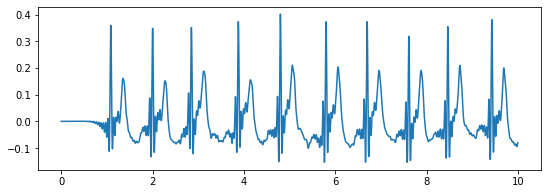

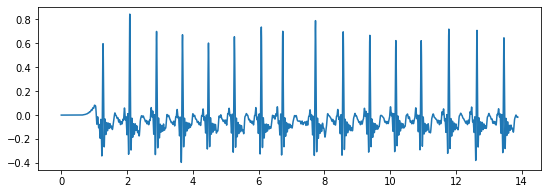

C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


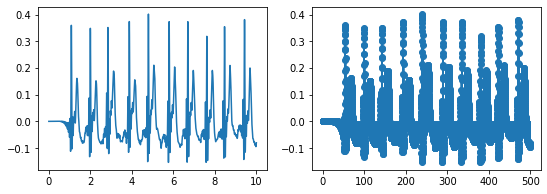

C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


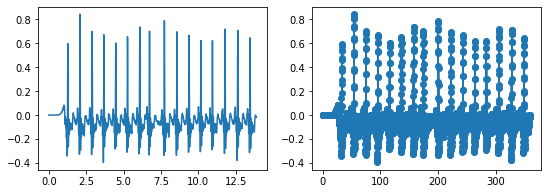

In [68]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

import pandas as pd
import os
root = os.getcwd() # Your folder location (if needed...)

df_normal = pd.read_csv(os.path.join(root,"ECG_Normal.csv")).to_numpy()
df_anormal = pd.read_csv(os.path.join(root,"ECG_Arrhythmia.csv")).to_numpy()

t_ech_norm = 1/500
t_ech_anormal = 1/360

x_norm = np.array([k*t_ech_norm for k in range(len(df_normal))])
x_anorm = np.array([k*t_ech_anormal for k in range(len(df_anormal))])

plotSignal(x_norm,df_normal)
plotSignal(x_anorm,df_anormal)


fft_array_norm = np.fft.fft(df_normal)
fft_array_anorm = np.fft.fft(df_anormal)
d_f_n = 500/len(df_normal)
d_f_a = 360/len(df_anormal)
x_fft_norm = [k*d_f_n for k in range(len(fft_array_norm))]
x_fft_anorm = [k*d_f_a for k in range(len(fft_array_anorm))]

plotSignalAndDft(x_norm,df_normal,x_fft_norm,fft_array_norm)
plotSignalAndDft(x_anorm,df_anormal,x_fft_anorm,fft_array_anorm)



<font size=5 color=#009999> <i>3.2  Zero insertion and Zero padding</i> </font> <br> 

The objective of this exercise is to study the impact of zero insertion and zero padding on the discrete Fourier transform.

Perform and study impact of the following modification on the ECG recorded on the healthy patient (without arrythmia),
<ol>
   <li> Given that the original signal contains N samples, append N zeros to the end of the ECG signal. Display the FFT of the new signal of size 2N; 
   <li> Insert one zero between every element of the original ECG. Display the FFT of the new signal of size 2N.
</ol>

-------------------------------- ORIGINAL --------------------------------


C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


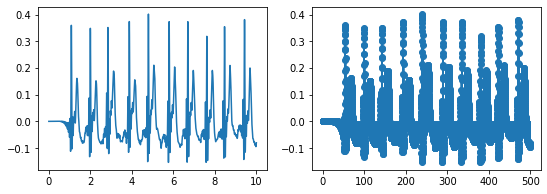

-------------------------------- 0 AT END --------------------------------


C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


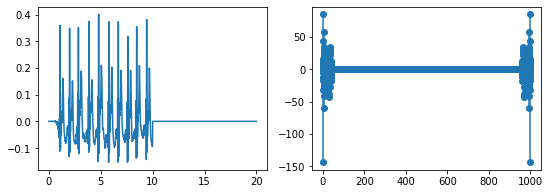

-------------------------------- 0 BETWEEN --------------------------------


C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


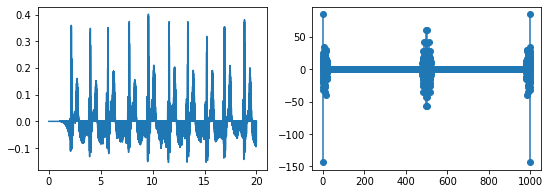

In [78]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

N = len(df_normal);


print("-------------------------------- ORIGINAL --------------------------------")
fft_array_norm = np.fft.fft(df_normal)
d_f_n = 500/len(df_normal)
x_fft_norm = [k*d_f_n for k in range(len(fft_array_norm))]
plotSignalAndDft(x_norm,df_normal,x_fft_norm,fft_array_norm)

print("-------------------------------- 0 AT END --------------------------------")
new_arr = np.append(df_normal,[0 for _ in range(N)]);
x_norm_n = np.array([k*t_ech_norm for k in range(len(new_arr))])
fft_array_norm_n = np.fft.fft(new_arr)
d_f_n_n = 500/len(df_normal)
x_fft_norm_n = [k*d_f_n_n for k in range(len(fft_array_norm_n))]
plotSignalAndDft(x_norm_n,new_arr,x_fft_norm_n,fft_array_norm_n)


print("-------------------------------- 0 BETWEEN --------------------------------")
new_array = copy.deepcopy(df_normal)
for k in range(N-1):
    new_array = np.insert(new_array,2*(k+1),0)

x_norm_n = np.array([k*t_ech_norm for k in range(len(new_array))])
fft_array_norm_n = np.fft.fft(new_array)
d_f_n_n = 500/len(df_normal)
x_fft_norm_n = [k*d_f_n_n for k in range(len(fft_array_norm_n))]
plotSignalAndDft(x_norm_n,new_array,x_fft_norm_n,fft_array_norm_n)



<font size=5 color=#009999> <b>3. Filtering with the Convolution Operator</b> </font> <br> 

Filtering in the time domain is performed using a convolution operation. Convolution employs a convolution filter, which is an array of N values. A convolution filter can also be referred to as a convolution mask, an impulse response (IR), or a convolution kernel. 

We here introduce several examples of Finite Impulse Response (FIR) filters. These are FIR because the number of elements in the impulse response is finite. 

<font size=5 color=#009999> <i>3.1 Mean Filter or Moving Average Filter</i> </font> <br> 

The mean filter performs the arithmetic mean of M consecutive samples of the input signal. For example, the kernel with M=3 is 

$$ h_{Mean} = \left( \frac13, \frac13, \frac13 \right) $$

The mean filter is a low pass filter which attenuates higher frequencies. 

<font size=5 color=#009999> <i>3.2 Derivative Filter</i> </font> <br> 

The derivation of a numerical signal relies on the Taylor expansion: 

$$ f(t \pm \epsilon) = f'(t) \pm \epsilon f'(t) + \mathcal{O}(\epsilon^2)$$

$$ f'(t)  \approx \frac{f(t + \epsilon) - f(t)}{\epsilon} $$

Written as numerical formula, it is expressed as :

$$ Y_n = \frac{X_n - X_{n-1}}{T_e} $$ 

where $T_e$ is the sampling frequency. This evalution of the derivative of a signal is called the *backward finite difference*. The corresponding impulse response is in that case:

$$ h_{Derivative} = (-1,1) $$

From the initial Taylor expansion, we can also derive a similar formula: 

$$ f'(t)  \approx \frac{f(t+\epsilon) - f(t-\epsilon)}{2 \epsilon}  $$

This gives the following finite difference called *centered finite difference*: 

$$ Y_n = \frac{X_n - X_{n-2}}{2T_e} $$ 

The associated impulse response is given by: 

$$ h_{CenteredDerivative} = (-1,0,1) $$

<font size=5 color=#009999> <i>3.3 Exercise</i> </font> <br> 

Follow the questions listed below and interpret your results after each step.
<ol>
   <li> Generate a signal by the addition of a 0.5 Hz sine wave at amplitude 2 and a 6 Hz sine wave at amplitude 0.4. Plot the Fourier transform of this signal; 
   <li> Apply a mean filter on this signal with the help of the convolution operator. Plot the Fourier transform of the filtered signal;
    <li> Apply a centered finite difference derivative filter on this signal with the help of the convolution operator. Plot the Fourier transform of the filtered signal.
</ol>

---------------------------------------------------------------- INITIAL ----------------------------------------------------------------


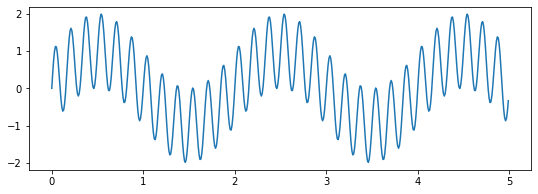

C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


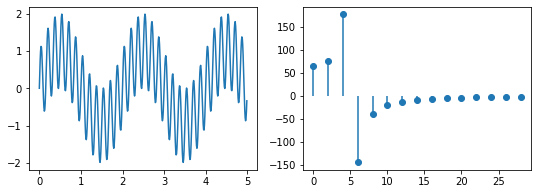

In [98]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
print("---------------------------------------------------------------- INITIAL ----------------------------------------------------------------")
ts = 0.01
x = np.arange(0,5,0.01)
s1 = np.sin(2*np.pi*0.5*x)
s2 = np.sin(2*np.pi*6*x)

s = s1 + s2
plotSignal(x,s)

fft_array_norm = np.fft.fft(s)
d_f_n = 1/(len(s)*ts)*10
x_fft_norm = [k*d_f_n for k in range(len(fft_array_norm))]
plotSignalAndDft(x,s,x_fft_norm[:15],fft_array_norm[:15])


---------------------------------------------------------------- MEAN FILTRED ----------------------------------------------------------------


C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


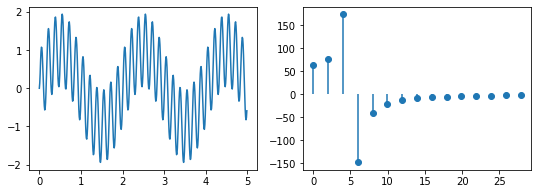

In [101]:
print("---------------------------------------------------------------- MEAN FILTRED ----------------------------------------------------------------")

ts = 0.01
x = np.arange(0,5,0.01)
s1 = np.sin(2*np.pi*0.5*x)
s2 = np.sin(2*np.pi*6*x)

s = np.convolve(s1 + s2,[1/3,1/3,1/3])


fft_array_norm = np.fft.fft(s)
d_f_n = 1/(len(s)*ts)*10
x_fft_norm = [k*d_f_n for k in range(len(fft_array_norm))]
plotSignalAndDft(x,s[:-2],x_fft_norm[:15],fft_array_norm[:15])

---------------------------------------------------------------- MEAN FILTRED ----------------------------------------------------------------


C:\Python310\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


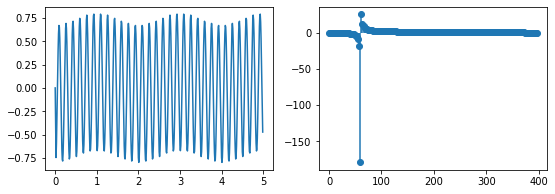

In [103]:
print("---------------------------------------------------------------- MEAN FILTRED ----------------------------------------------------------------")

ts = 0.01
x = np.arange(0,5,0.01)
s1 = np.sin(2*np.pi*0.5*x)
s2 = np.sin(2*np.pi*6*x)

s = np.convolve(s1 + s2,[-1,0,1])


fft_array_norm = np.fft.fft(s)
d_f_n = 1/(len(s)*ts)*10
x_fft_norm = [k*d_f_n for k in range(len(fft_array_norm))]
plotSignalAndDft(x,s[:-2],x_fft_norm[:200],fft_array_norm[:200])